In [53]:
import numpy as np
import os
import matplotlib.pyplot as plt
from collections import Counter


from sklearn.model_selection import train_test_split
from music21 import *
import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter("ignore")


In [40]:
#load files

path = './archive (1)/'
midi_list=[]

for i in os.listdir(path):
    if i.endswith('.mid'):
        full_path=path + i 
        midi=converter.parse(full_path)
        midi_list.append(midi)


#https://www.kaggle.com/karnikakapoor/music-generation-lstm/notebook

In [96]:
#https://www.analyticsvidhya.com/blog/2020/01/how-to-perform-automatic-music-generation/
#function read midi files
def extract_notes(file):
    notes = []
    notes_to_parse = None
    
    for f in file:
        s2 = instrument.partitionByInstrument(f)
        for part in s2.parts:
            notes_to_parse = part.recurse()
            for element in notes_to_parse:
                if isinstance(element, note.Note):
                    notes.append(str(element.pitch))
                elif isinstance(element, chord.Chord):
                    notes.append(".".join(str(n) for n in element.normalOrder))

    return notes

note_corpus=extract_notes(midi_list)

print(f'Amount of notes from midis is: {len(note_corpus)}')


      

Amount of notes from midis is: 107464


In [97]:
#flattening array from 2d to 1d
notes_=[element for note_ in note_corpus for element in note_]

#amount of unique notes
unique_notes=list(set(notes_))

print(len(unique_notes))

20


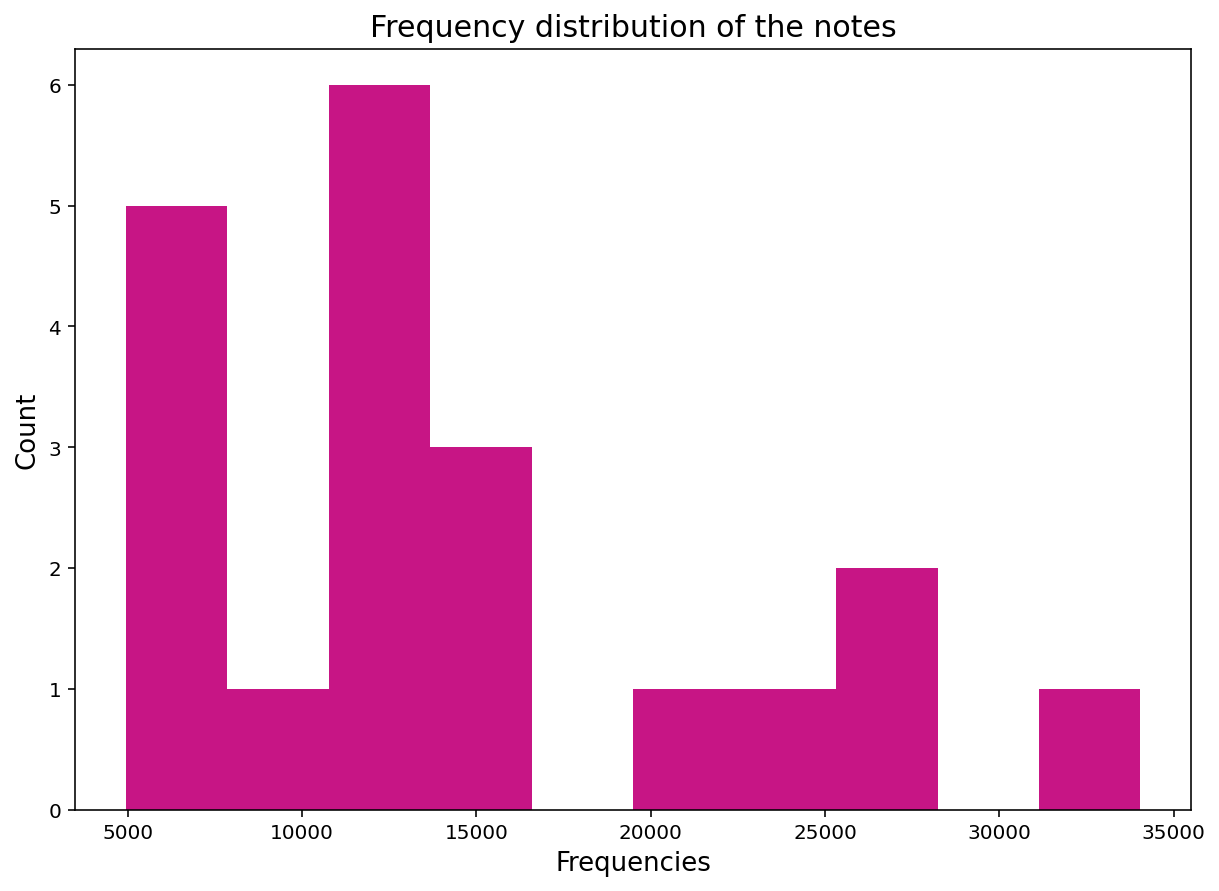

In [98]:
#computing frequency of each note
freq=dict(Counter(notes_))

#only the frequency info
only_freq=[count for _,count in freq.items()]

plt.figure(figsize=(10,7))
plt.title("Frequency distribution of the notes", fontsize=15)
plt.ylabel('Count', fontsize= 13)
plt.xlabel('Frequencies', fontsize= 13)
plt.hist(only_freq, color = 'mediumvioletred');

In [99]:
frequent_notes=[note_ for note_, count in freq.items() if count >=50]
print(len(frequent_notes))

20


In [100]:
print(f'First 40 notes: {note_corpus[:40]}')

First 40 notes: ['C2', '0.4', '7.0', '0.4', '7.0', '0.4', '7.0', '0.4', '7.0', '0.4', '7.0', '0.4', '7.0', '0.4', '7.0', '0.4', '7.0', '0.4', '7.0', '0.4', '7.0', '0.4', '7.0', '0.4', '7.0', '0.4', '7.0', '2.6', '9.0', '2.6', '9.0', '2.7', '7.11', '7.11', '7.11', 'B3', '7.11', 'A3', 'G3', '7.11']


In [101]:
new_m=[]

for notes in notes_array:
    temp=[]
    for note_ in notes:
        if note_ in frequent_notes:
            temp.append(note_)
    new_m.append(temp)

new_m = np.array(new_m)

TypeError: iteration over a 0-d array

In [102]:
no_of_timesteps=32

x= []
y= []

for note_ in new_m:
    for i in range(0, len(note_) - no_of_timesteps, 1):
        
        input_=note_[i:i +no_of_timesteps]
        output=note_[i + no_of_timesteps]
        
        x.append(input_)
        y.append(output)
        
x=np.array(x)
y=np.array(y)

In [103]:
unique_int=list(set(x.ravel()))
x_note_int=dict((note_, number) for number, note_ in enumerate(unique_int))

In [104]:
x_seq=[]
for i in x:
    temp = []
    
    for j in i:
        
        temp.append(x_note_int[j])
    x_seq.append(temp)
x_seq = np.array(x_seq)

In [105]:
unique_y=list(set(y))
y_note_int= dict((note_, number) for number, note_ in enumerate(unique_y))
y_seq = np.array([y_note_int[i]for i in y])


In [94]:
X_train, X_test, y_train, y_test = train_test_split(x_seq, y_seq, random_state=42)

ValueError: With n_samples=0, test_size=0.25 and train_size=None, the resulting train set will be empty. Adjust any of the aforementioned parameters.